# Modelo Standar Cosmológico

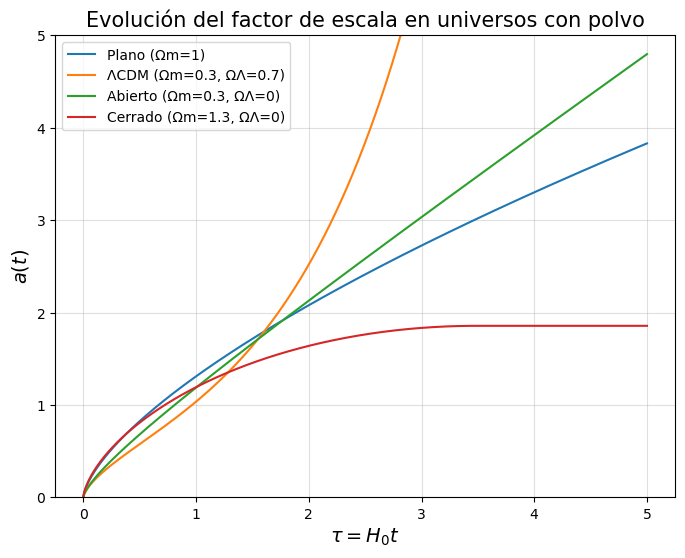

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos la ecuación de Friedmann normalizada
def friedmann(tau, a, Omega_m, Omega_L, Omega_k):
    argument = Omega_m / a**3 + Omega_k / a**2 + Omega_L
    if argument >=0 :
        return a * np.sqrt(argument)
    else: 
        return 0
    

# Condición inicial (universo muy pequeño)
a_ini = 1e-3
tau_span = (0, 5)   # tiempo en unidades de H0^{-1}
tau_eval = np.linspace(tau_span[0], tau_span[1], 1500)

# Casos cosmológicos
cosmos = {
    "Plano (Ωm=1)": (1.0, 0.0, 0.0),
    "ΛCDM (Ωm=0.3, ΩΛ=0.7)": (0.3, 0.7, 0.0),
    "Abierto (Ωm=0.3, ΩΛ=0)": (0.3, 0.0, 0.7),
    "Cerrado (Ωm=1.3, ΩΛ=0)": (1.3, -0.0, -0.7),
}

plt.figure(figsize=(8,6))

for label, (Om, OL, Ok) in cosmos.items():
    sol = solve_ivp(
        friedmann, tau_span, [a_ini], args=(Om, OL, Ok),
        t_eval=tau_eval, rtol=1e-8
    )
    plt.plot(sol.t, sol.y[0], label=label)

plt.xlabel(r"$\tau = H_0 t$", fontsize=14)
plt.ylabel(r"$a(t)$", fontsize=14)
plt.title("Evolución del factor de escala en universos con polvo", fontsize=15)
plt.legend()
plt.grid(True, alpha=0.4)
plt.ylim(0, 5)
plt.show()


C:\Users\juanr\AppData\Local\Temp\ipykernel_33156\2286085524.py:17: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  val, _ = quad(integrand, 1e-6, 1.0, limit=200)


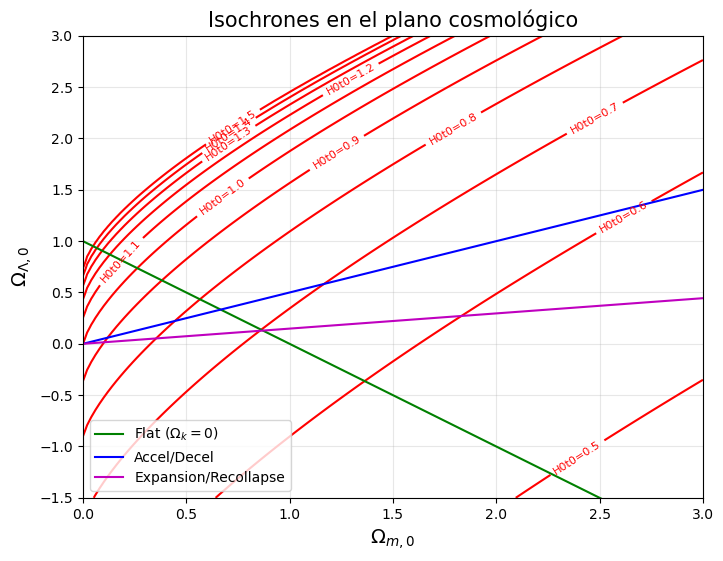

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# -------------------------
# Edad del universo (adimensional H0 t0)
# -------------------------
def age_of_universe(Om, OL):
    Ok = 1.0 - Om - OL
    # Si H^2 se hace negativo en algún punto, no es un universo válido
    def integrand(a):
        E2 = Om/a**3 + Ok/a**2 + OL
        if E2 <= 0:
            return np.nan
        return 1.0 / (a * np.sqrt(E2))
    try:
        val, _ = quad(integrand, 1e-6, 1.0, limit=200)
        return val
    except:
        return np.nan

# -------------------------
# Grid en el plano (Om, OL)
# -------------------------
Om_vals = np.linspace(0.0, 3.0, 150)
OL_vals = np.linspace(-1.5, 3.0, 150)
Om_grid, OL_grid = np.meshgrid(Om_vals, OL_vals)

Ht_grid = np.zeros_like(Om_grid)

for i in range(Om_grid.shape[0]):
    for j in range(Om_grid.shape[1]):
        Ht_grid[i,j] = age_of_universe(Om_grid[i,j], OL_grid[i,j])

# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(8,6))
cs = plt.contour(Om_grid, OL_grid, Ht_grid, 
                 levels=np.arange(0.5, 1.6, 0.1), 
                 colors='red')
plt.clabel(cs, inline=True, fontsize=8, fmt="H0t0=%.1f")

# Líneas de frontera
Om = np.linspace(0,3,200)

# Línea de curvatura: universo plano (Ok=0)
plt.plot(Om, 1-Om, 'g-', label=r"Flat ($\Omega_k=0$)")

# Línea de transición aceleración/deceleración
# condición: q0=0 -> ΩΛ = Ωm/2
plt.plot(Om, Om/2, 'b-', label="Accel/Decel")

# Línea de recaptura (recollapse): ΩΛ = (4/27)Ωm
plt.plot(Om, 4*Om/27, 'm-', label="Expansion/Recollapse")

plt.xlabel(r"$\Omega_{m,0}$", fontsize=14)
plt.ylabel(r"$\Omega_{\Lambda,0}$", fontsize=14)
plt.title("Isochrones en el plano cosmológico", fontsize=15)
plt.legend()
plt.ylim(-1.5, 3.0)
plt.xlim(0, 3.0)
plt.grid(alpha=0.3)
plt.show()
